In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
maindata = pd.read_csv('Train_data.csv')
data = maindata.copy()

In [ ]:
data = maindata
data.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


## Train Test Splitting of Data

In [ ]:
train_data = data.loc[0:8227]
test_data = data.loc[8227:]

In [ ]:
train_data.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


## Data Preprocessing

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8228 entries, 0 to 8227
Data columns (total 17 columns):
id                  8228 non-null int64
acousticness        8228 non-null float64
danceability        8228 non-null float64
energy              8228 non-null float64
explicit            8228 non-null object
instrumentalness    8228 non-null float64
key                 8228 non-null int64
liveness            8228 non-null float64
loudness            8228 non-null float64
mode                8228 non-null object
release_date        8228 non-null object
speechiness         8228 non-null float64
tempo               8228 non-null float64
valence             8228 non-null float64
year                8228 non-null int64
duration-min        8228 non-null float64
popularity          8228 non-null object
dtypes: float64(10), int64(3), object(4)
memory usage: 1.1+ MB


In [ ]:
train_data.columns

Index(['id', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'valence', 'year',
       'duration-min', 'popularity'],
      dtype='object')

In [ ]:
# Onehot encoding for the columns explicit and mode
train_data = pd.get_dummies(train_data,columns = ['explicit','mode'])
train_data.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,release_date,speechiness,tempo,valence,year,duration-min,popularity,explicit_No,explicit_Yes,mode_Major,mode_Minor
0,2015,0.949,0.235,0.0276,0.9270,5,0.513,-27.398,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,1,0,1,0
1,15901,0.855,0.456,0.4850,0.0884,4,0.151,-10.046,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,1,0,1,0
2,9002,0.827,0.495,0.4990,0.0000,0,0.401,-8.009,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,1,0,0,1
3,6734,0.654,0.643,0.4690,0.1080,7,0.218,-15.917,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,1,0,1,0
4,15563,0.738,0.705,0.3110,0.0000,5,0.322,-12.344,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,1,0,1,0


In [ ]:
#Extracting the month from release date column
train_data['release_month'] = pd.to_datetime(train_data['release_date']).dt.month
train_data.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,release_date,speechiness,tempo,valence,year,duration-min,popularity,explicit_No,explicit_Yes,mode_Major,mode_Minor,release_month
0,2015,0.949,0.235,0.0276,0.9270,5,0.513,-27.398,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low,1,0,1,0,1
1,15901,0.855,0.456,0.4850,0.0884,4,0.151,-10.046,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low,1,0,1,0,11
2,9002,0.827,0.495,0.4990,0.0000,0,0.401,-8.009,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low,1,0,0,1,1
3,6734,0.654,0.643,0.4690,0.1080,7,0.218,-15.917,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low,1,0,1,0,4
4,15563,0.738,0.705,0.3110,0.0000,5,0.322,-12.344,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average,1,0,1,0,1


In [ ]:
train_data.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,explicit_No,explicit_Yes,mode_Major,mode_Minor,release_month
count,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000
mean,8098.652042,0.425265,0.555895,0.525297,0.148102,5.240034,0.201539,-10.615426,0.096535,118.528524,0.524472,1984.764220,3.864390,0.892319,0.107681,0.693000,0.307000,4.261424
std,4685.544913,0.365819,0.175541,0.261506,0.296930,3.524540,0.175186,5.454241,0.154037,30.401471,0.256658,25.816904,2.102581,0.309996,0.309996,0.461278,0.461278,3.936420
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-41.594000,0.000000,0.000000,0.000000,1920.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4054.500000,0.057800,0.435000,0.308000,0.000000,2.000000,0.095900,-13.615000,0.034600,95.209500,0.322000,1966.000000,2.900000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,8082.000000,0.340000,0.568000,0.536000,0.000107,5.000000,0.132000,-9.517000,0.045200,117.191000,0.533000,1988.000000,3.500000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,12171.250000,0.798000,0.685000,0.742000,0.053800,8.000000,0.254000,-6.527250,0.077800,136.865000,0.735000,2008.000000,4.400000,1.000000,0.000000,1.000000,1.000000,8.000000
max,16225.000000,0.996000,0.980000,1.000000,1.000000,11.000000,0.994000,1.006000,0.968000,216.083000,0.993000,2021.000000,62.200000,1.000000,1.000000,1.000000,1.000000,12.000000


In [ ]:
train_data['popularity'].unique()

array(['very low', 'low', 'average', 'high', 'very high'], dtype=object)

In [ ]:
#Mapping the different labels to different integers
popularity_map = {'very low':1 ,'low':2, 'average':3, 'high':4, 'very high':5}
train_data['popularity'] = train_data['popularity'].map(popularity_map)
train_data.head()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,release_date,speechiness,tempo,valence,year,duration-min,popularity,explicit_No,explicit_Yes,mode_Major,mode_Minor,release_month
0,2015,0.949,0.235,0.0276,0.9270,5,0.513,-27.398,01-01-1947,0.0381,110.838,0.0398,1947,3.0,1,1,0,1,0,1
1,15901,0.855,0.456,0.4850,0.0884,4,0.151,-10.046,13-11-2020,0.0437,152.066,0.8590,2020,2.4,2,1,0,1,0,11
2,9002,0.827,0.495,0.4990,0.0000,0,0.401,-8.009,01-01-1950,0.0474,108.004,0.7090,1950,2.6,1,1,0,0,1,1
3,6734,0.654,0.643,0.4690,0.1080,7,0.218,-15.917,30-04-1974,0.0368,83.636,0.9640,1974,2.4,2,1,0,1,0,4
4,15563,0.738,0.705,0.3110,0.0000,5,0.322,-12.344,01-01-1973,0.0488,117.260,0.7850,1973,3.4,3,1,0,1,0,1


In [ ]:
#Feature Scaling
scaled_features = ['key','loudness','tempo','year','duration-min']
for s in scaled_features:
    train_data[s] = (train_data[s]-train_data[s].min())/(train_data[s].max()-train_data[s].min())


In [ ]:
train_data.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity,explicit_No,explicit_Yes,mode_Major,mode_Minor,release_month
count,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000,8228.000000
mean,8098.652042,0.425265,0.555895,0.525297,0.148102,0.476367,0.201539,0.727197,0.096535,0.548532,0.524472,0.641230,0.059103,2.499514,0.892319,0.107681,0.693000,0.307000,4.261424
std,4685.544913,0.365819,0.175541,0.261506,0.296930,0.320413,0.175186,0.128034,0.154037,0.140693,0.256658,0.255613,0.033913,1.177304,0.309996,0.309996,0.461278,0.461278,3.936420
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4054.500000,0.057800,0.435000,0.308000,0.000000,0.181818,0.095900,0.656784,0.034600,0.440615,0.322000,0.455446,0.043548,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,8082.000000,0.340000,0.568000,0.536000,0.000107,0.454545,0.132000,0.752981,0.045200,0.542343,0.533000,0.673267,0.053226,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000
75%,12171.250000,0.798000,0.685000,0.742000,0.053800,0.727273,0.254000,0.823163,0.077800,0.633391,0.735000,0.871287,0.067742,3.000000,1.000000,0.000000,1.000000,1.000000,8.000000
max,16225.000000,0.996000,0.980000,1.000000,1.000000,1.000000,0.994000,1.000000,0.968000,1.000000,0.993000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,12.000000


In [ ]:
train_data.corr()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity,explicit_No,explicit_Yes,mode_Major,mode_Minor,release_month
id,1.000000,0.005729,-0.005370,0.012871,0.002173,0.003497,0.009377,0.006878,-0.020027,0.012083,-0.001089,0.016764,0.001533,0.016205,-0.010060,0.010060,0.012413,-0.012413,0.016396
acousticness,0.005729,1.000000,-0.284294,-0.741091,0.268117,-0.021688,-0.019542,-0.577306,-0.033358,-0.205483,-0.165507,-0.561945,-0.083516,-0.406750,0.228895,-0.228895,0.063701,-0.063701,-0.205331
danceability,-0.005370,-0.284294,1.000000,0.200797,-0.249341,0.027558,-0.129888,0.285764,0.226361,-0.025053,0.480261,0.218534,-0.105613,0.223650,-0.269242,0.269242,-0.069139,0.069139,0.099096
energy,0.012871,-0.741091,0.200797,1.000000,-0.211779,0.039223,0.128228,0.783516,-0.078467,0.233692,0.326247,0.493005,0.053472,0.330122,-0.122318,0.122318,-0.062401,0.062401,0.205223
instrumentalness,0.002173,0.268117,-0.249341,-0.211779,1.000000,-0.023919,-0.019636,-0.365727,-0.106804,-0.094795,-0.186937,-0.206235,0.091153,-0.318639,0.144541,-0.144541,-0.048847,0.048847,-0.049331
key,0.003497,-0.021688,0.027558,0.039223,-0.023919,1.000000,-0.005645,0.031113,0.013958,0.024882,0.035229,0.014463,0.000689,0.020607,-0.013498,0.013498,-0.150925,0.150925,-0.002508
liveness,0.009377,-0.019542,-0.129888,0.128228,-0.019636,-0.005645,1.000000,0.044751,0.102404,0.005671,0.005192,-0.047339,0.033397,-0.105630,-0.025156,0.025156,0.018865,-0.018865,0.026709
loudness,0.006878,-0.577306,0.285764,0.783516,-0.365727,0.031113,0.044751,1.000000,-0.150747,0.201363,0.263305,0.510254,0.012396,0.417381,-0.178569,0.178569,-0.038538,0.038538,0.225880
speechiness,-0.020027,-0.033358,0.226361,-0.078467,-0.106804,0.013958,0.102404,-0.150747,1.000000,-0.005570,0.044037,-0.161473,-0.101921,-0.121290,-0.343695,0.343695,-0.039672,0.039672,0.016633
tempo,0.012083,-0.205483,-0.025053,0.233692,-0.094795,0.024882,0.005671,0.201363,-0.005570,1.000000,0.129859,0.118897,-0.023283,0.080042,-0.029083,0.029083,0.008792,-0.008792,0.041077


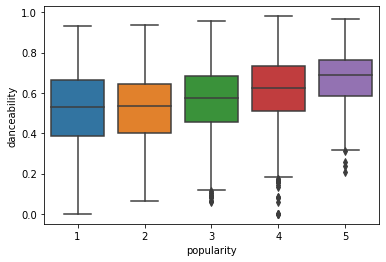

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['danceability'])

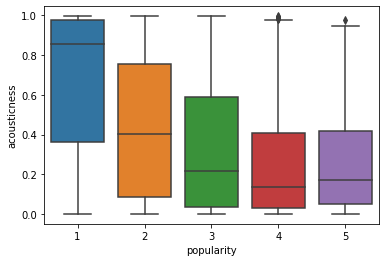

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['acousticness'])

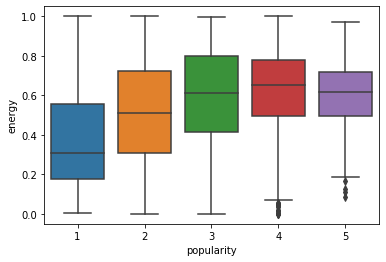

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['energy'])

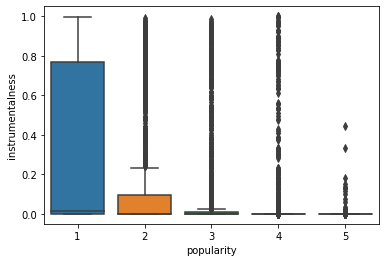

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['instrumentalness'])

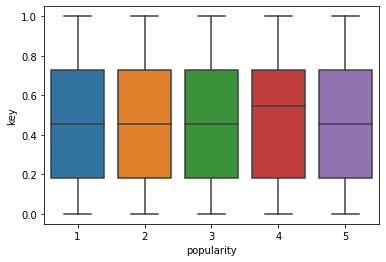

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['key'])

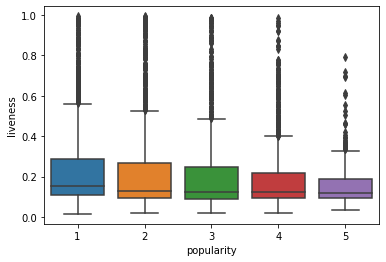

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['liveness'])

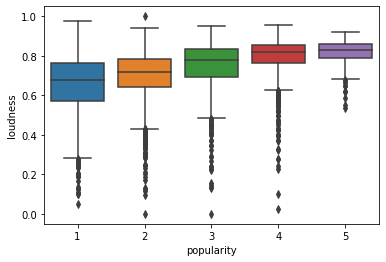

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['loudness'])

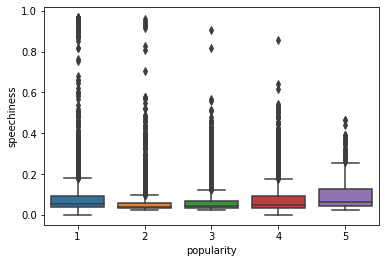

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['speechiness'])

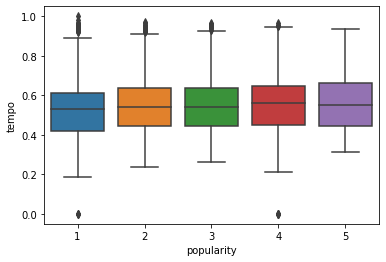

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['tempo'])

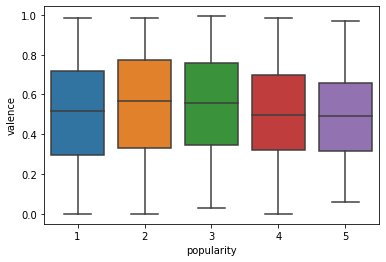

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['valence'])

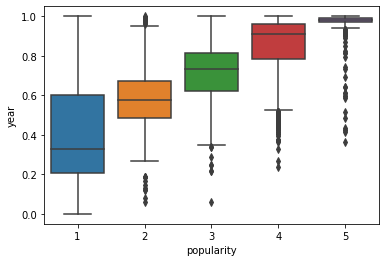

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['year'])

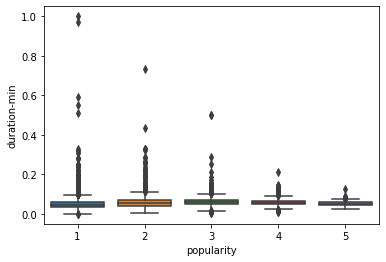

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['duration-min'])

In [ ]:
#Treating outliers in the data across different columns
outlier_columns = [ 'acousticness', 'danceability', 'energy',
       'instrumentalness','liveness', 'loudness',
        'speechiness', 'tempo', 'year',
       'duration-min']
from scipy import stats
train_data = train_data[np.all(np.abs(stats.zscore(train_data[outlier_columns])) <= 3, axis = 1)]

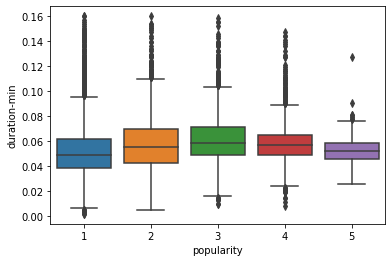

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['duration-min'])

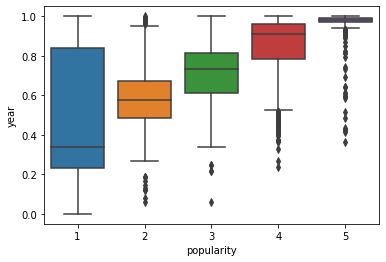

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['year'])

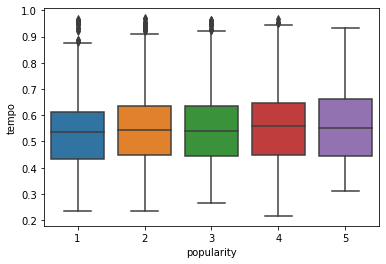

In [ ]:
sns.boxplot(x = train_data['popularity'],y= train_data['tempo'])

In [ ]:
test_data.shape

(4000, 17)

In [ ]:
#Dropping the irrelevant columns for predicting
train_data.drop(columns = ['id','release_date'],inplace = True)
train_data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity,explicit_No,explicit_Yes,mode_Major,mode_Minor,release_month
1,0.855,0.456,0.485,0.08840,0.363636,0.1510,0.740563,0.0437,0.703739,0.859,0.990099,0.035484,2,1,0,1,0,11
2,0.827,0.495,0.499,0.00000,0.000000,0.4010,0.788380,0.0474,0.499826,0.709,0.297030,0.038710,1,1,0,0,1,1
3,0.654,0.643,0.469,0.10800,0.636364,0.2180,0.602746,0.0368,0.387055,0.964,0.534653,0.035484,2,1,0,1,0,4
4,0.738,0.705,0.311,0.00000,0.454545,0.3220,0.686620,0.0488,0.542662,0.785,0.524752,0.051613,3,1,0,1,0,1
5,0.898,0.498,0.442,0.00319,0.909091,0.0974,0.753826,0.0337,0.507300,0.355,0.475248,0.038710,2,1,0,1,0,1


## Feature Selection

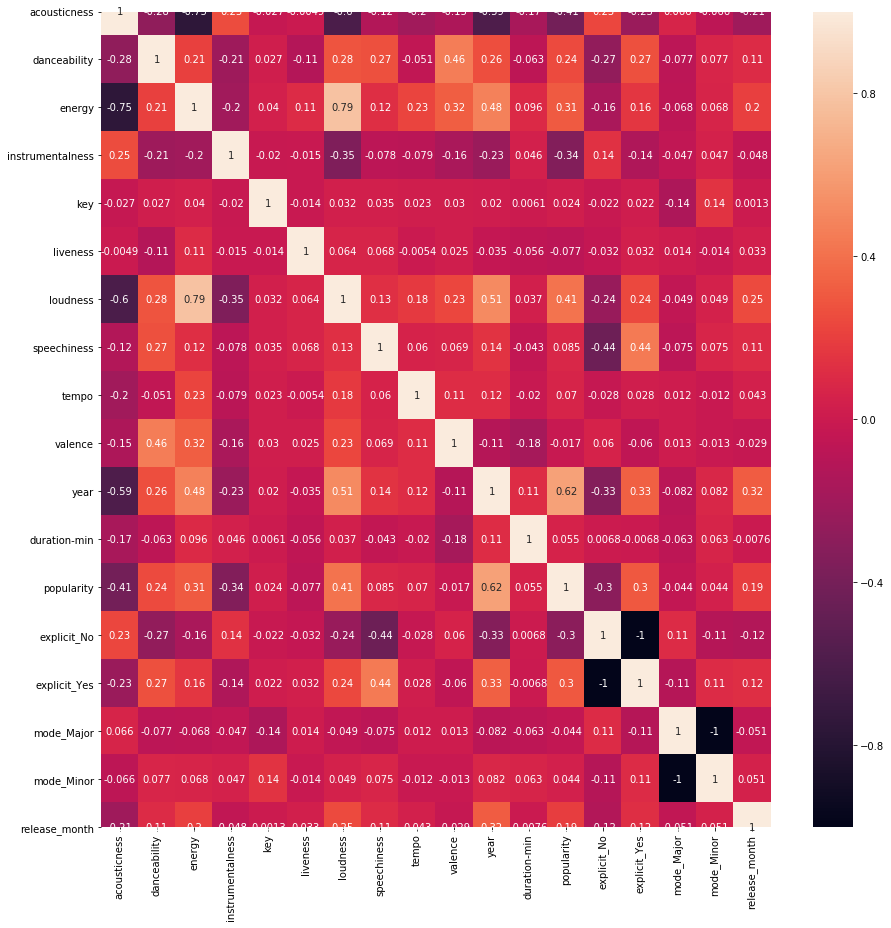

In [ ]:
plt.figure(figsize = (15,15))
sns.set
sns.heatmap(train_data.corr(),annot = True)


In [ ]:
train_data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity,explicit_No,explicit_Yes,mode_Major,mode_Minor,release_month
1,0.855,0.456,0.485,0.08840,0.363636,0.1510,0.740563,0.0437,0.703739,0.859,0.990099,0.035484,2,1,0,1,0,11
2,0.827,0.495,0.499,0.00000,0.000000,0.4010,0.788380,0.0474,0.499826,0.709,0.297030,0.038710,1,1,0,0,1,1
3,0.654,0.643,0.469,0.10800,0.636364,0.2180,0.602746,0.0368,0.387055,0.964,0.534653,0.035484,2,1,0,1,0,4
4,0.738,0.705,0.311,0.00000,0.454545,0.3220,0.686620,0.0488,0.542662,0.785,0.524752,0.051613,3,1,0,1,0,1
5,0.898,0.498,0.442,0.00319,0.909091,0.0974,0.753826,0.0337,0.507300,0.355,0.475248,0.038710,2,1,0,1,0,1


In [ ]:
#Selecting features based on correlation matrix
selected_features = []
for i in train_data.columns:
        if(abs(train_data.corr().loc[i,'popularity']) > 0.1):
            selected_features.append(i)
print(selected_features)

['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'year', 'popularity', 'explicit_No', 'explicit_Yes', 'release_month']


In [ ]:
#Removing all the features from the selected features if they are intercorrelated with each other
final_features = []
for i in selected_features:
    for j in selected_features:
        if(abs(train_data.corr().loc[i,j]) > 0.5):
            if(train_data.corr().loc[i,'popularity'] > train_data.corr().loc[j,'popularity']):
                final_features.append(i)
            else:
                final_features.append(j)
final_features = list(set(final_features))
final_features = [i for i in final_features if i != 'popularity']
print(final_features)

['loudness', 'instrumentalness', 'explicit_No', 'danceability', 'year', 'explicit_Yes', 'release_month', 'acousticness', 'energy']


## Training the Model

In [ ]:
train_Y = train_data.loc[:,'popularity'].values
train_X = train_data.loc[:,final_features].values

In [ ]:
train_data['popularity'].value_counts()

2    1938
3    1923
1    1798
4    1705
5     262
Name: popularity, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 944,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True,random_state = 14)
classifier.fit(train_X,train_Y)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=944, random_state=14)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(train_X,train_Y)

GradientBoostingClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_X,train_Y)

C:\Users\Vineeth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

## Preprocessing the Testset


In [ ]:
# Onehot encoding for the columns explicit and mode
test_data = pd.get_dummies(test_data,columns = ['explicit','mode'])

#Extracting the month from release date column
test_data['release_month'] = pd.to_datetime(test_data['release_date']).dt.month

#Mapping the different labels to different integers
popularity_map = {'very low':1 ,'low':2, 'average':3, 'high':4, 'very high':5}
test_data['popularity'] = test_data['popularity'].map(popularity_map)

#Feature Scaling
scaled_features = ['key','loudness','tempo','year','duration-min']
for s in scaled_features:
    test_data[s] = (test_data[s]-test_data[s].min())/(test_data[s].max()-test_data[s].min())
    
#Dropping the irrelevant columns for predicting
test_data.drop(columns = ['id','release_date'],inplace = True)

In [ ]:
test_Y = test_data.loc[:,'popularity'].values
test_X = test_data.loc[:,final_features].values

## Testing the model on the Test set

In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("RandomForestClassifier")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))
print(classification_report(test_Y,predictions))

RandomForestClassifier
0.56475
0.5720822267525554
[[821 108  40  59  51]
 [ 91 608 293  22   8]
 [ 32 267 402 219   7]
 [ 38  84 177 353 214]
 [  3   2   3  23  75]]
              precision    recall  f1-score   support

           1       0.83      0.76      0.80      1079
           2       0.57      0.59      0.58      1022
           3       0.44      0.43      0.44       927
           4       0.52      0.41      0.46       866
           5       0.21      0.71      0.33       106

    accuracy                           0.56      4000
   macro avg       0.52      0.58      0.52      4000
weighted avg       0.59      0.56      0.57      4000



In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("LogisticRegression")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))
print(classification_report(test_Y,predictions))

LogisticRegression
0.434
0.43828710732111165
[[726 162  40  67  84]
 [323 411 220  47  21]
 [136 230 266 205  90]
 [ 49  84 128 256 349]
 [  3   2   3  21  77]]
              precision    recall  f1-score   support

           1       0.59      0.67      0.63      1079
           2       0.46      0.40      0.43      1022
           3       0.40      0.29      0.34       927
           4       0.43      0.30      0.35       866
           5       0.12      0.73      0.21       106

    accuracy                           0.43      4000
   macro avg       0.40      0.48      0.39      4000
weighted avg       0.47      0.43      0.44      4000



In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("GradientBoostingClassifier")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))
print(classification_report(test_Y,predictions))

GradientBoostingClassifier
0.5625
0.5679595432202965
[[834  99  45  55  46]
 [100 603 272  39   8]
 [ 34 276 369 238  10]
 [ 45  95 154 373 199]
 [  3   2   3  27  71]]
              precision    recall  f1-score   support

           1       0.82      0.77      0.80      1079
           2       0.56      0.59      0.58      1022
           3       0.44      0.40      0.42       927
           4       0.51      0.43      0.47       866
           5       0.21      0.67      0.32       106

    accuracy                           0.56      4000
   macro avg       0.51      0.57      0.52      4000
weighted avg       0.58      0.56      0.57      4000



In [ ]:
predictions = classifier.predict(train_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("RandomForestClassifier")
print(accuracy_score(train_Y,predictions))
print(f1_score(train_Y,predictions,average = 'weighted'))
print(confusion_matrix(train_Y,predictions))
print(classification_report(train_Y,predictions))

RandomForestClassifier
0.7202989771833203
0.7167882904858672
[[1521  111   44  121    1]
 [  98 1588  235   16    1]
 [  43  526 1181  173    0]
 [  21  239  310 1132    3]
 [   2   11   10  168   71]]
              precision    recall  f1-score   support

           1       0.90      0.85      0.87      1798
           2       0.64      0.82      0.72      1938
           3       0.66      0.61      0.64      1923
           4       0.70      0.66      0.68      1705
           5       0.93      0.27      0.42       262

    accuracy                           0.72      7626
   macro avg       0.77      0.64      0.67      7626
weighted avg       0.73      0.72      0.72      7626



In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state= 1)
classifier.fit(train_X,train_Y)

DecisionTreeClassifier(random_state=1)

In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print("DecisionTreeClassifier")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))

DecisionTreeClassifier
0.48275
0.4954021670918425
[[755 143  59  66  56]
 [ 88 459 314 112  49]
 [ 67 216 357 235  52]
 [ 52  92 182 292 248]
 [  6   5   5  22  68]]


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(train_X,train_Y)

SVC()

In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print("Support Vector Machine Classifier")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))

Support Vector Machine Classifier
0.32475
0.3025570253688476
[[761 147  16  12 143]
 [323 363  49  13 274]
 [151 365  38  37 336]
 [ 51 179  39  46 551]
 [  3   4   5   3  91]]


In [ ]:
print(classifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 944, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomizedSearchCV(estimator = classifier,param_distributions = random_grid,cv=5,n_iter = 100,random_state = 42,verbose = 2)
rf_model.fit(train_X,train_Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.9s
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.7s
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.6s
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.5s
[CV] n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=311, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   5.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sample

In [ ]:
rf_model.best_params_

In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print("Gradient Boosting Classifier")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))

Gradient Boosting Classifier
0.6192229038854806
0.6158830967334865
[[527  49  23  43   3]
 [ 78 422 110  10   1]
 [ 20 211 239  95   1]
 [ 26  74 123 297  23]
 [  1   2   4  34  29]]


In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("LogisticRegression")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))
print(classification_report(test_Y,predictions))

LogisticRegression
0.5177914110429448
0.49924850260855563
[[427 109  23  86   0]
 [183 289 123  26   0]
 [ 78 153 167 168   0]
 [ 29  67  64 383   0]
 [  1   2   2  65   0]]
              precision    recall  f1-score   support

           1       0.59      0.66      0.63       645
           2       0.47      0.47      0.47       621
           3       0.44      0.30      0.35       566
           4       0.53      0.71      0.60       543
           5       0.00      0.00      0.00        70

    accuracy                           0.52      2445
   macro avg       0.41      0.43      0.41      2445
weighted avg       0.49      0.52      0.50      2445



C:\Users\Vineeth\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
train_X = train_data.loc[:,final_features].values
train_Y = train_data.loc[:,'popularity'].values
oversampling = SMOTE()
undersampler = RandomUnderSampler(random_state = 1)
train_X,train_Y = undersampler.fit_resample(train_X,train_Y)
train_X.shape

(1310, 9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 944,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True,random_state = 14)
classifier.fit(train_X,train_Y)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=944, random_state=14)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state = 14)
classifier.fit(train_X,train_Y)

[15:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=14, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
predictions = classifier.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("XGB Classifier")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))
print(classification_report(test_Y,predictions))

XGB Classifier
0.546
0.556560681897661
[[804 111  55  61  48]
 [ 85 546 311  63  17]
 [ 38 227 394 246  22]
 [ 28  92 171 369 206]
 [  1   3   3  28  71]]
              precision    recall  f1-score   support

           1       0.84      0.75      0.79      1079
           2       0.56      0.53      0.55      1022
           3       0.42      0.43      0.42       927
           4       0.48      0.43      0.45       866
           5       0.20      0.67      0.30       106

    accuracy                           0.55      4000
   macro avg       0.50      0.56      0.50      4000
weighted avg       0.58      0.55      0.56      4000



In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier()
easy.fit(train_X,train_Y)

EasyEnsembleClassifier()

In [ ]:
predictions = easy.predict(test_X)
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
print("EasyEnsembleClassifier")
print(accuracy_score(test_Y,predictions))
print(f1_score(test_Y,predictions,average = 'weighted'))
print(confusion_matrix(test_Y,predictions))
print(classification_report(test_Y,predictions))

EasyEnsembleClassifier
0.352
0.3433891554337874
[[244 693  22  41  79]
 [ 83 620 229  63  27]
 [ 73 324 296 159  75]
 [ 81 103 131 159 392]
 [  3   3   3   8  89]]
              precision    recall  f1-score   support

           1       0.50      0.23      0.31      1079
           2       0.36      0.61      0.45      1022
           3       0.43      0.32      0.37       927
           4       0.37      0.18      0.25       866
           5       0.13      0.84      0.23       106

    accuracy                           0.35      4000
   macro avg       0.36      0.44      0.32      4000
weighted avg       0.41      0.35      0.34      4000



In [ ]:
def get_max_revenue(test_Y,pred_Y):
    revenue = 0
    left_out = 10000
    for i in range(len(test_Y)):
        if(test_Y[i] <= pred_Y[i]):
            if(left_out >= pred_Y[i]):
                left_out = left_out - pred_Y[i]
                revenue = revenue + 2*test_Y[i]
    print("Revenue generated:"+str(revenue))
    print("Leftout money:"+str(left_out))
    revenue_score = revenue/np.sum(2*test_Y)
    print("Revenue Score"+str(revenue_score))

In [ ]:
get_max_revenue(test_Y,predictions)
#For easy ensemble classifier

Revenue generated:14090
Leftout money:1644


In [ ]:
get_max_revenue(test_Y,predictions)
#For Random Forest Classifier

Revenue generated:13612
Leftout money:2368


In [ ]:
get_max_revenue(test_Y,predictions)
#For Decision Tree Classifier

Revenue generated:13946
Leftout money:1466


In [ ]:
get_max_revenue(test_Y,predictions)
#For XGB classifier

Revenue generated:13934
Leftout money:2021


In [ ]:
#Gradient Boosting Classifier
get_max_revenue(test_Y,predictions)

Revenue generated:13882
Leftout money:2169


In [ ]:
#LogisticRegression
get_max_revenue(test_Y,predictions)

Revenue generated:13368
Leftout money:1968


In [ ]:
#SupportVectorMachines
get_max_revenue(test_Y,predictions)

Revenue generated:13136
Leftout money:2230


In [ ]:
#Random Forest after oversampling with SMOTE
get_max_revenue(test_Y,predictions)

Revenue generated:14226
Leftout money:1910


In [ ]:
#XGB Classifier after oversampling with SMOTE
get_max_revenue(test_Y,predictions)

Revenue generated:14326
Leftout money:1689


In [ ]:
#Decision Tree Classifier after oversampling with SMOTE
get_max_revenue(test_Y,predictions)

Revenue generated:13896
Leftout money:1377


In [ ]:
#Easy Ensemble Classifier after oversampling with SMOTE
get_max_revenue(test_Y,predictions)

Revenue generated:13628
Leftout money:1975


In [ ]:
#Gradient Boosting Classifier after oversampling with SMOTE
get_max_revenue(test_Y,predictions)

Revenue generated:14202
Leftout money:1900


In [ ]:
#Logistic RegressionClassifier after oversampling with SMOTE
get_max_revenue(test_Y,predictions)

Revenue generated:14228
Leftout money:1059


In [ ]:
#Support Vector Classifier after oversampling with SMOTE
get_max_revenue(test_Y,predictions)

Revenue generated:14254
Leftout money:835


In [ ]:
get_max_revenue(test_Y,predictions)
#For Random Forest Classifier after undersampling

Revenue generated:14936
Leftout money:1155
Revenue Score0.7544958577490402


In [ ]:
get_max_revenue(test_Y,predictions)
#For easy ensemble classifier with undersampling

Revenue generated:14392
Leftout money:491
Revenue Score0.727015558698727


In [ ]:
get_max_revenue(test_Y,predictions)
#For XGB after undersampling

Revenue generated:15188
Leftout money:826
Revenue Score0.767225702162053


In [ ]:
get_max_revenue(test_Y,predictions)
#For Support Vector Classifier after undersampling

Revenue generated:13106
Leftout money:503
Revenue Score0.6620529399878763


In [ ]:
get_max_revenue(test_Y,predictions)
#For decision tree classifier after undersampling

Revenue generated:14758
Leftout money:666
Revenue Score0.7455041422509598


In [ ]:
get_max_revenue(test_Y,predictions)
#For gradient Boosting classifier after undersampling

Revenue generated:14834
Leftout money:1214
Revenue Score0.7493433016771065


In [ ]:
get_max_revenue(test_Y,predictions)
#For Logistic Regression after undersampling

Revenue generated:13930
Leftout money:1145
Revenue Score0.7036775106082037


In [ ]:
2*np.sum(test_Y)

19796